In [93]:
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id ='f22713124fb04e97a26f46a51547744f',
                                                          client_secret='75c001d5dfc54f6cb6e44f7a54cdabc0'))

In [72]:
def import_top_100_billboardsongs():
    from bs4 import BeautifulSoup
    import requests
    url = "https://www.billboard.com/charts/hot-100"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    rank_list = soup.select("li span.chart-element__rank__number")
    song_list = soup.select("li span.chart-element__information__song")
    artist_list = soup.select("li span.chart-element__information__artist")
    rank = []
    song = []
    artist = []
    len_top100 = len(soup.select("li span.chart-element__information__song"))
    for i in range(len_top100):
        rank.append(rank_list[i].get_text())
        song.append(song_list[i].get_text())
        artist.append(artist_list[i].get_text())
    
    return pd.DataFrame({'Rank':rank,'song':song,'artist':artist})

In [58]:
df_fullsong = pd.read_csv('full_songlist_without_duplicates.csv')

In [59]:
df_fullsong.head()

,Unnamed: 0,track_id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,215627,4
1,1,5uEYRdEIh9Bo4fpjDd4Na9,Goosebumps - Remix,Travis Scott,0.841,0.593,1,-7.846,1,0.0379,0.4180,0.000000,0.124,0.808,124.917,162803,4
2,2,3eZYOQO4UzKrUDYDghtnFw,test drive,Ariana Grande,0.698,0.708,9,-4.943,0,0.0454,0.0251,0.000000,0.124,0.322,115.036,122174,4
3,3,1diS6nkxMQc3wwC4G1j0bh,We're Good,Dua Lipa,0.722,0.588,6,-5.932,1,0.0544,0.0319,0.000000,0.183,0.590,134.010,165507,4
4,4,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,242014,4


In [60]:
df_fullsong = df_fullsong.drop(labels = 'Unnamed: 0', axis=1)

In [61]:
df_fullsong.head()

,track_id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,215627,4
1,5uEYRdEIh9Bo4fpjDd4Na9,Goosebumps - Remix,Travis Scott,0.841,0.593,1,-7.846,1,0.0379,0.4180,0.000000,0.124,0.808,124.917,162803,4
2,3eZYOQO4UzKrUDYDghtnFw,test drive,Ariana Grande,0.698,0.708,9,-4.943,0,0.0454,0.0251,0.000000,0.124,0.322,115.036,122174,4
3,1diS6nkxMQc3wwC4G1j0bh,We're Good,Dua Lipa,0.722,0.588,6,-5.932,1,0.0544,0.0319,0.000000,0.183,0.590,134.010,165507,4
4,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,242014,4


In [62]:
df_song_id = df_fullsong.copy()
df_song_id = df_song_id.drop(columns = df_song_id.columns[3:])

In [63]:
df_song_id.head()

,track_id,name,artist
0,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd
1,5uEYRdEIh9Bo4fpjDd4Na9,Goosebumps - Remix,Travis Scott
2,3eZYOQO4UzKrUDYDghtnFw,test drive,Ariana Grande
3,1diS6nkxMQc3wwC4G1j0bh,We're Good,Dua Lipa
4,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo


In [14]:
df_fullsong = df_fullsong.drop(columns = df_fullsong.columns[0:3])

In [15]:
df_fullsong.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,215627,4
1,0.841,0.593,1,-7.846,1,0.0379,0.4180,0.000000,0.124,0.808,124.917,162803,4
2,0.698,0.708,9,-4.943,0,0.0454,0.0251,0.000000,0.124,0.322,115.036,122174,4
3,0.722,0.588,6,-5.932,1,0.0544,0.0319,0.000000,0.183,0.590,134.010,165507,4
4,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,242014,4


In [16]:
X = df_fullsong.copy()

In [38]:
STDC = StandardScaler()

In [39]:
STDC.fit(X)

StandardScaler()

In [40]:
X_prep = STDC.transform(X)

In [41]:
X_prep_df = pd.DataFrame(X_prep, columns=df_fullsong.columns)

## Check variance in Audio Features:

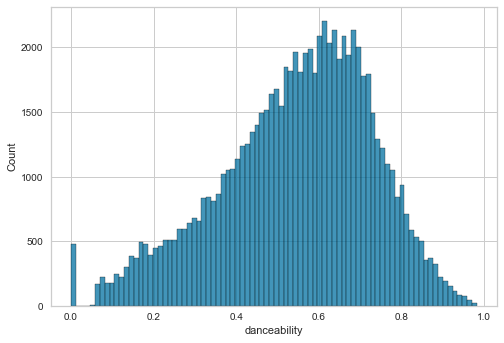

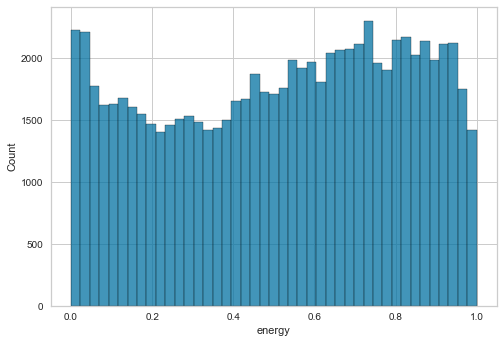

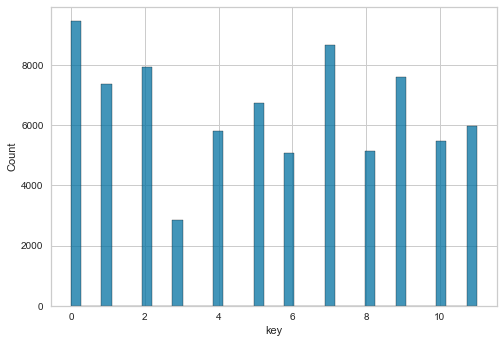

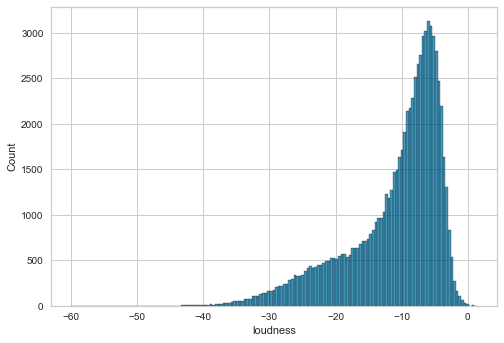

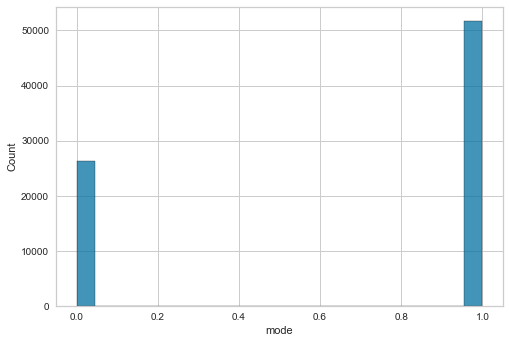

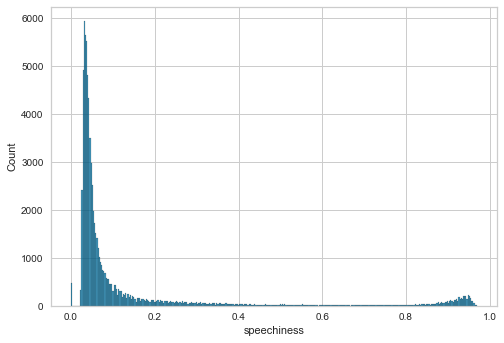

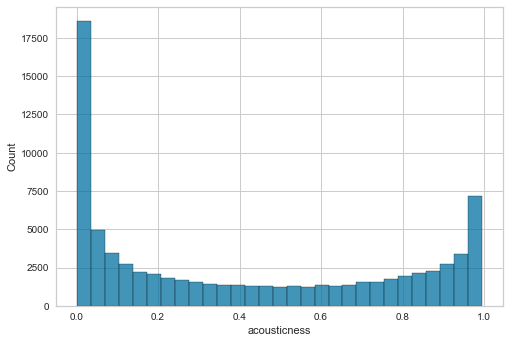

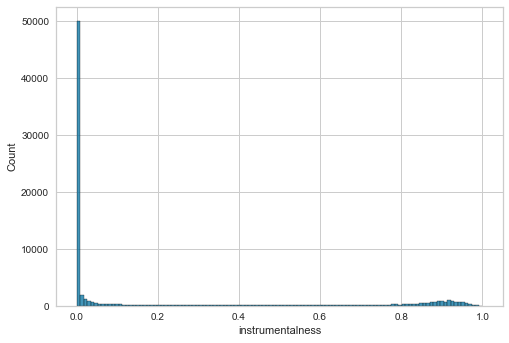

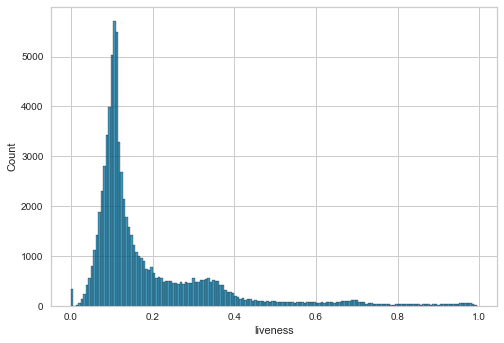

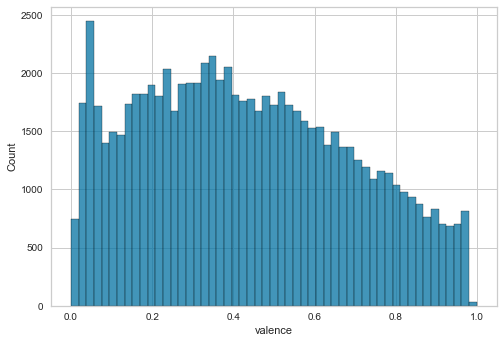

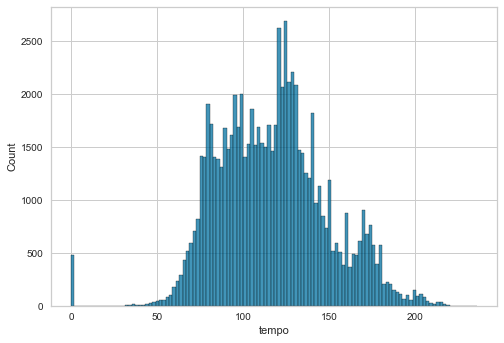

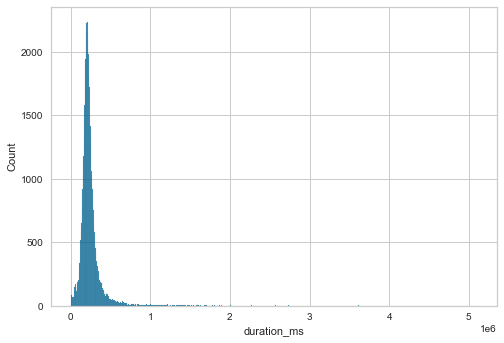

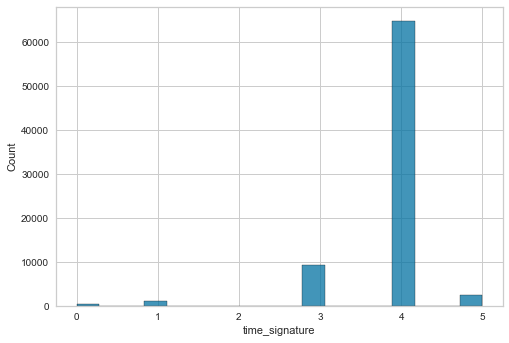

In [42]:
for feature in X.columns:
    sns.histplot(X[feature])
    plt.show()

In [43]:
X_prep_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.727443,1.050025,-1.468513,0.786661,0.713153,-0.468185,-1.050163,-0.569526,2.178021,0.831284,0.036976,-0.176669,0.265847
1,1.597075,0.249705,-1.188690,0.456062,0.713153,-0.436960,0.024482,-0.569563,-0.401753,1.471078,0.253316,-0.419371,0.265847
2,0.824669,0.644713,1.049894,0.862899,-1.402224,-0.403505,-1.039601,-0.569563,-0.401753,-0.424898,-0.058024,-0.606042,0.265847
3,0.954304,0.232531,0.210425,0.724297,0.713153,-0.363360,-1.021185,-0.569563,-0.038491,0.620620,0.539828,-0.406947,0.265847
4,0.214306,-0.289566,1.329717,0.327831,0.713153,-0.337934,0.845091,-0.569524,-0.518736,-1.166124,0.850632,-0.055433,0.265847


## Check how clusternumber impacts inertia:

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

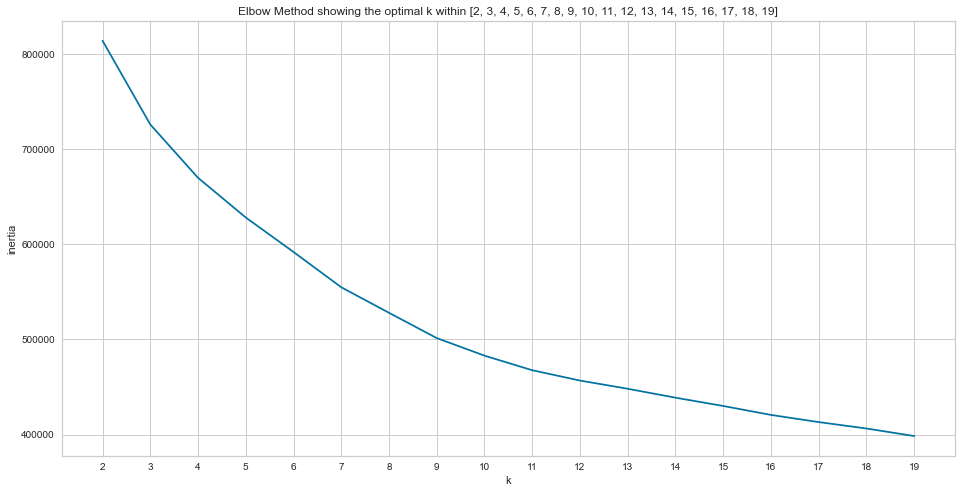

In [27]:
K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                random_state=1234,
                n_init=20,
                algorithm='elkan',
                max_iter=25)
    kmeans.fit(X_prep)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

## Considering Silhouette values:

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

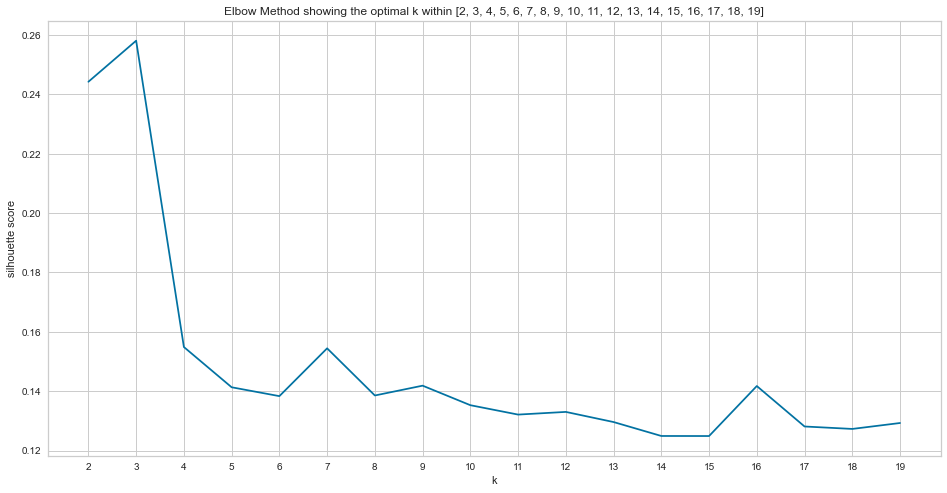

In [51]:

K = range(2,20)
silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                random_state=1234,
                n_init=10,
                algorithm='elkan',
                max_iter=10)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep,
                                     kmeans.predict(X_prep)
                                    )
                   )

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

Concerning this silhouette result and knowing there most be more than only 3 different genres of songs, we could aim either for 7 or 16 clusters. The inertia from 7 to 16 cluster is still going down rougly 20% while Silhoute is only 10% worse. 

In [290]:
kmeans = KMeans(n_clusters=16,
                random_state=1234,
                n_init=10,
                algorithm='elkan',
                max_iter=25,
                   )
kmeans.fit(X_prep_df)

# print the cluster centers
clusters_coordinates = kmeans.cluster_centers_

print(clusters_coordinates)

[[ 6.16420856e-01 -1.12489943e+00  2.14214939e-01 -1.29403021e+00
  -5.48454118e-02  3.03439460e+00  6.66515209e-01 -5.32081257e-01
   1.20994638e-01 -8.81753608e-02 -1.95865163e-01  1.57366543e-01
   8.11777140e-01]
 [ 6.04695849e-01  5.95892613e-01 -1.10729084e+00  5.81659993e-01
   7.13152634e-01 -2.38807029e-01 -6.06739468e-01 -4.76611507e-01
  -1.79771988e-01  7.42281459e-01  4.89181377e-03 -1.73875317e-01
   2.42772323e-01]
 [-2.16193125e-01 -7.24007458e-01 -8.89380232e-01 -1.27819260e-01
   4.33937663e-01 -3.78122020e-01  8.72372811e-01 -4.51702128e-01
  -3.00617050e-01 -4.22429265e-01 -1.37276057e-01 -1.16208715e-01
   2.67085258e-02]
 [-3.62038445e-01  8.30785976e-01  1.54639511e-01  6.88527353e-01
  -1.40222437e+00 -2.09594149e-01 -8.32883022e-01 -3.37889023e-01
  -3.53271249e-03 -3.22599850e-01  5.71778799e-01 -6.18996381e-02
   1.81687150e-01]
 [-1.19830043e+00 -1.32130222e+00  1.03422013e-01 -1.58490133e+00
  -1.40222437e+00 -3.80589198e-01  1.31627485e+00  1.65343973e+00


In [35]:
clusters_predictions = kmeans.predict(X_prep)

In [36]:
pd.Series(clusters_predictions).value_counts().sort_index()

0     2658
1     8468
2     6873
3     6233
4     3469
5     7132
6     6026
7     9136
8      760
9      918
10    1187
11    3229
12    5240
13    8432
14    2263
15    5982
dtype: int64

In [51]:
X.shape

(78006, 13)

In [50]:
len(clusters_predictions)

78006

## Add Cluster Predictions to df:

In [53]:
X['Cluster'] = clusters_predictions

In [54]:
X.shape

(78006, 14)

In [64]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Cluster
0,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,215627,4,11
1,0.841,0.593,1,-7.846,1,0.0379,0.4180,0.000000,0.124,0.808,124.917,162803,4,1
2,0.698,0.708,9,-4.943,0,0.0454,0.0251,0.000000,0.124,0.322,115.036,122174,4,13
3,0.722,0.588,6,-5.932,1,0.0544,0.0319,0.000000,0.183,0.590,134.010,165507,4,7
4,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,242014,4,15


In [65]:
df_fullsong_clusters = pd.concat([df_song_id,X], axis = 1)

In [66]:
df_fullsong_clusters.head()

,track_id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Cluster
0,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,215627,4,11
1,5uEYRdEIh9Bo4fpjDd4Na9,Goosebumps - Remix,Travis Scott,0.841,0.593,1,-7.846,1,0.0379,0.4180,0.000000,0.124,0.808,124.917,162803,4,1
2,3eZYOQO4UzKrUDYDghtnFw,test drive,Ariana Grande,0.698,0.708,9,-4.943,0,0.0454,0.0251,0.000000,0.124,0.322,115.036,122174,4,13
3,1diS6nkxMQc3wwC4G1j0bh,We're Good,Dua Lipa,0.722,0.588,6,-5.932,1,0.0544,0.0319,0.000000,0.183,0.590,134.010,165507,4,7
4,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,242014,4,15


## Import Top 100 Billboardsongs:

In [70]:
df_top_100 = import_top_100_billboardsongs()

In [71]:
df_top_100.head()

,Rank,song,artist
0,1,Drivers License,Olivia Rodrigo
1,2,34+35,Ariana Grande
2,3,Calling My Phone,Lil Tjay Featuring 6LACK
3,4,Blinding Lights,The Weeknd
4,5,Up,Cardi B


In [247]:
#result['tracks']['items'][0]['artists'][0]['external_urls']
#result['tracks']['items'][0]['id']
audio_features = list(sp.audio_features(sp.search(q=songname,limit=1,type='track')['tracks']['items'][0]['id'])[0].keys())
print(audio_features)
pd.DataFrame([sp.audio_features(sp.search(q=songname,limit=1,type='track')['tracks']['items'][0]['id'])[0]]).drop(columns=audio_features[11:16]).shape

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']


(1, 13)

In [259]:
audio_f_dic = sp.audio_features(sp.search(q=songname,limit=1,type='track')['tracks']['items'][0]['id'])[0]
x = pd.DataFrame([audio_f_dic]).drop(columns=list(audio_f_dic.keys())[11:16])
x_prep = STDC.transform(x)
cluster_song_prediction = kmeans.predict(x)[0]
newsong = df_fullsong_clusters[df_fullsong_clusters['Cluster']==cluster_song_prediction].sample(1)
name = newsong['name'].values[0]
artist = newsong['artist'].values[0]
sp.tracks(newsong['track_id'])['tracks'][0]['external_urls']['spotify']

'https://open.spotify.com/track/5Dfsv1QVtITxhKhmkmOsBS'

## 2nd Prototype:

In [299]:
def recommend_a_song(songname): 
    try:
        if songname in list(df_top_100['song']):
            oldrank = df_top_100[df_top_100['song']==songname]['Rank'].values[0]
            newsong = df_top_100[df_top_100['song']!=songname].sample(1)
            name = newsong['song'].values[0]
            artist = newsong['artist'].values[0]
            newrank = newsong['Rank'].values[0]
            sp_result = sp.search(q=newsong['song'].values[0],limit=1,type='track')
            URL = sp_result['tracks']['items'][0]['external_urls']['spotify']
            print(f'Your Song is in the Top 100 Billboard Songs at Rank {oldrank} \n'
                    f'why dont you try: -> {name} from {artist} <- at current Ranking: {newrank}\n'
                    f'Url: {URL}')
        else:
            audio_f_dic = sp.audio_features(sp.search(q=songname,limit=1,type='track')['tracks']['items'][0]['id'])[0]
            x = pd.DataFrame([audio_f_dic]).drop(columns=list(audio_f_dic.keys())[11:16])
            x_prep = STDC.transform(x)
            cluster_song_prediction = kmeans.predict(x_prep)[0]
            newsong = df_fullsong_clusters[df_fullsong_clusters['Cluster']==cluster_song_prediction].sample(1)
            name = newsong['name'].values[0]
            artist = newsong['artist'].values[0]
            URL = sp.tracks(newsong['track_id'])['tracks'][0]['external_urls']['spotify']
            print(f'Your Song is not in the top 100 Billboard Songs but i guess you would \n'
                    f'also like that song: -> {name} from {artist} <- \n'
                    f'Url: {URL} \n'
                    f'btw: current cluster used: {cluster_song_prediction}')
    except:
        print('Something went wrong - try again!')

In [300]:
recommend_a_song(str(input()))

Ausgehen
Your Song is not in the top 100 Billboard Songs but i guess you would 
also like that song: -> C.r.e.e.p. from The Fall <- 
Url: https://open.spotify.com/track/4PFQdnNl4WoaC9XdMgzDxn 
btw: current cluster used: 13


In [302]:
recommend_a_song(str(input()))

34+35
Your Song is in the Top 100 Billboard Songs at Rank 2 
why dont you try: -> Almost Maybes from Jordan Davis <- at current Ranking: 96
Url: https://open.spotify.com/track/14JFKtBSqefxfMiKhq6JT8


In [303]:
recommend_a_song(str(input()))

Castanias - Kermesse
Your Song is not in the top 100 Billboard Songs but i guess you would 
also like that song: -> Reels: Kylebrack Ramblers / Graf Spee from The Shaskeen Ceili Band <- 
Url: https://open.spotify.com/track/6tWVMFlSwTPVOgeWBQMapG 
btw: current cluster used: 12


In [304]:
recommend_a_song(str(input()))

Castanias
Your Song is not in the top 100 Billboard Songs but i guess you would 
also like that song: -> In Cadence from Cameo Blush <- 
Url: https://open.spotify.com/track/2PJEppZXXaTmwLALhfcUUA 
btw: current cluster used: 12
